# Decomposition Analysis

The purpose of this analysis is to show the examples and intentions in a two-dimensional chart (Bubble Chart).

You can have the prepared data to import it on your own visualization tool (Tableau, Power BI, etc.).

## Index

- [Load libs and define parameters](#Load-libs-and-define-parameters)
- [Load data](#Load-data)
- [Intents Discovery](#IntentsDiscovery)
- [Examples PCA](#Examples-PCA)
- [Intents PCA](#Intents-PCA)

## Load libs and define parameters

In [1]:
## Add root path
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
# Imports
import numpy as np
import pandas as pd
from intents.discovery import IntentsDiscovery

In [3]:
# Parameters
parameters = {
    "remove_stopwords": True,
    "stopwords_file": "stopwords_ptBR.txt"
}

## Load data

In [4]:
df = pd.read_csv("unlabeled_examples.csv", names=["examples"])
print(df.shape)
df.head()

(1763, 1)


,examples
0,O que devo fazer se o adesivo “informações sob...
1,Pode explicar o procedimento para ativar um no...
2,Posso ativar meu cartão de crédito do celulare...
3,É possível reativar um cartão cancelado anteri...
4,Quais são as etapas que precisam ser seguidas ...


## IntentsDiscovery

In the next part, we'll use **IntentsDiscovey** class to preprocessing data, find the best number for `n_clusters` and get labels for a dataset of examples.

`search_n_clusters()` function uses an early stopping based on silhouette score.

In [10]:
# Instantiate an object of IntentsDiscovery class
intents_discovery = IntentsDiscovery(data=df["examples"].tolist())

# Apply preprocessing on dataset
intents_discovery.text_processing(stopwords=parameters["remove_stopwords"],
                                  stopwords_file=parameters["stopwords_file"])

# Find best n_clusters
intents_discovery.search_n_clusters()

12

## Analyse scores for each n_clusters tested

In [11]:
df_score = pd.DataFrame(intents_discovery.search_data)
df_score

,kmeans_score,silhouette_score,n_clusters
0,-1710.325631,0.009193,2
1,-1694.400832,0.011969,3
2,-1680.735435,0.013782,4
3,-1669.482405,0.015343,5
4,-1660.580243,0.016802,6
5,-1656.057078,0.017546,7
6,-1644.338518,0.018669,8
7,-1636.024403,0.020491,9
8,-1629.039291,0.020912,10
9,-1623.575428,0.018852,11


Silhouette score along the training session.

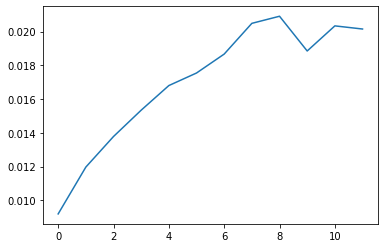

In [12]:
df_score["silhouette_score"].plot();

In [13]:
clustering_data = intents_discovery.clustering(n_clusters=intents_discovery.n_clusters)

df = pd.DataFrame({"examples": clustering_data["data"], "labels": clustering_data["labels"]})
print(df.shape)
df.head()

(1763, 2)


,examples,labels
0,O que devo fazer se o adesivo “informações sob...,contrato adesao cartao
1,Pode explicar o procedimento para ativar um no...,novo talao cheques
2,Posso ativar meu cartão de crédito do celulare...,cancelar cartao credito
3,É possível reativar um cartão cancelado anteri...,cancelar cartao credito
4,Quais são as etapas que precisam ser seguidas ...,endereco email preciso


In [14]:
df.groupby("labels").count()

,examples
labels,
cancelar cartao credito,146
contrato adesao cartao,61
data vencimento pagamento,93
endereco email preciso,103
endereco poderia melhorar,59
novo talao cheques,81
numero identificacao bancaria,961
pedido talao cheques,60
usar pontos fidelidade,49
